In [ ]:
# pip install tensorflow numpy

In [ ]:
import numpy as np
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.optimizers import Adam
import pandas as pd


In [ ]:
# Load the word embeddings from a txt file
mydf = pd.read_csv('/content/drive/MyDrive/Research files/mydf_filtered.csv')
print(mydf.shape)
mydf

(12067, 201)


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,gold,0.665368,0.575129,-0.233913,-0.803415,0.541873,-0.284748,-0.587410,0.304050,-0.976940,...,0.664564,-0.326792,-0.166843,0.089043,0.174635,0.708083,-0.211870,-0.922929,0.107179,0.442703
1,mines,-0.061983,-0.611545,0.075108,-1.006732,1.258891,-0.059213,-1.300372,-0.547770,0.142394,...,-0.045271,-0.081380,0.522956,-0.335626,0.570412,0.794796,-0.023208,0.021023,0.607977,-0.573830
2,creek,-0.047574,0.458035,0.221478,-0.578259,0.613073,-0.846475,-0.203815,1.112873,-1.040184,...,-0.104678,-0.689773,-0.158615,0.059416,1.047682,0.612500,0.655737,0.208093,-0.650601,-0.055082
3,work,0.488443,-0.393066,0.145720,-0.665517,0.423911,-0.420992,-0.329604,0.477476,-0.274982,...,-0.463748,0.348744,-0.168836,-0.793235,-0.274093,0.636341,0.018944,0.415261,0.409543,0.393351
4,copper,-0.012102,0.202483,0.003206,-0.243465,1.527658,-0.297196,-0.035213,0.253279,-0.732782,...,0.117608,-0.238600,-0.178582,-0.869530,-0.214733,0.395891,0.251760,0.630467,0.392041,0.138883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12062,xanthate,-0.031826,0.257864,-0.054609,0.185644,-0.256702,0.007058,0.342248,0.009022,-0.007677,...,0.030342,0.134292,0.025772,0.166147,-0.060410,-0.262042,-0.027989,0.021065,-0.031498,-0.007414
12063,yauco,-0.129316,0.196438,0.083277,0.112372,-0.092597,-0.162406,0.167547,0.049535,-0.147225,...,0.039223,0.048401,-0.136274,0.303611,-0.034266,-0.222302,-0.050786,0.147664,0.082796,-0.038463
12064,yearbook,0.161926,-0.127037,-0.179428,0.064139,0.039060,0.316847,-0.100566,-0.017685,-0.085215,...,0.061324,-0.095374,0.105686,0.122895,0.311127,0.216142,-0.028143,0.326211,-0.248389,-0.068676
12065,yest,0.113457,-0.214988,0.029493,0.070235,0.015440,-0.153996,0.007843,-0.117899,-0.028560,...,0.016367,0.091974,-0.056424,0.105577,-0.001417,-0.104674,-0.058605,-0.099760,0.224277,-0.158745


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
words = mydf.iloc[:, 0].values  # First column containing words
embeddings = mydf.iloc[:, 1:].values  # Rest of the columns are the word embeddings

In [ ]:
# Convert embeddings to tensor
embeddings_tensor = torch.tensor(embeddings, dtype=torch.float32)

In [ ]:
# Define autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, encoding_dim),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded,decoded


In [ ]:
# Define dimensions
input_dim = embeddings.shape[1]  # The number of dimensions in the word embeddings
encoding_dim = 16

# Split data into training and test sets
X_train, X_test = train_test_split(embeddings_tensor, test_size=0.2, random_state=42)

# Create DataLoader
batch_size = 64
train_dataset = TensorDataset(X_train)
test_dataset = TensorDataset(X_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Initialize model, loss function, and optimizer
model = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss(reduction = 'sum')  # Mean Squared Error for reconstruction
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the autoencoder
num_epochs = 30

for epoch in range(num_epochs):
    train_loss = 0.0
    model.train()  # Set the model to training mode
    for data in train_loader:
        inputs = data[0]

        # Forward pass
        encoded, decoded = model(inputs)
        loss = criterion(decoded, inputs)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Calculate average train loss
    train_loss /= len(train_loader.dataset)


    # Calculate test loss
    test_loss = 0.0
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for data in test_loader:
            inputs = data[0]
            encoded, decoded = model(inputs)
            loss = criterion(decoded, inputs)
            test_loss += loss.item()

    # Calculate average test loss
    test_loss /= len(test_loader.dataset)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/30], Train Loss: 16.7996, Test Loss: 16.8709
Epoch [2/30], Train Loss: 16.4195, Test Loss: 16.6893
Epoch [3/30], Train Loss: 16.2799, Test Loss: 16.5538
Epoch [4/30], Train Loss: 16.1762, Test Loss: 16.4983
Epoch [5/30], Train Loss: 16.1010, Test Loss: 16.4304
Epoch [6/30], Train Loss: 16.0280, Test Loss: 16.3713
Epoch [7/30], Train Loss: 15.9650, Test Loss: 16.3004
Epoch [8/30], Train Loss: 15.8991, Test Loss: 16.2587
Epoch [9/30], Train Loss: 15.8308, Test Loss: 16.1975
Epoch [10/30], Train Loss: 15.7715, Test Loss: 16.1688
Epoch [11/30], Train Loss: 15.7314, Test Loss: 16.1453
Epoch [12/30], Train Loss: 15.6971, Test Loss: 16.1208
Epoch [13/30], Train Loss: 15.6703, Test Loss: 16.1056
Epoch [14/30], Train Loss: 15.6390, Test Loss: 16.0906
Epoch [15/30], Train Loss: 15.6184, Test Loss: 16.0820
Epoch [16/30], Train Loss: 15.5884, Test Loss: 16.0615
Epoch [17/30], Train Loss: 15.5596, Test Loss: 16.0669
Epoch [18/30], Train Loss: 15.5341, Test Loss: 16.0444
Epoch [19/30], Trai

In [ ]:
# Define autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, encoding_dim),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded,decoded


In [ ]:
# Initialize model, loss function, and optimizer
encoding_dim = 2  # Dimension for encoded representation (can be modified)

model = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss(reduction = 'sum')  # Mean Squared Error for reconstruction
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [ ]:
# Train the autoencoder
num_epochs = 30

for epoch in range(num_epochs):
    train_loss = 0.0
    model.train()  # Set the model to training mode
    for data in train_loader:
        inputs = data[0]

        # Forward pass
        encoded, decoded = model(inputs)
        loss = criterion(decoded, inputs)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Calculate average train loss
    train_loss /= len(train_loader.dataset)


    # Calculate test loss
    test_loss = 0.0
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for data in test_loader:
            inputs = data[0]
            encoded, decoded = model(inputs)
            loss = criterion(decoded, inputs)
            test_loss += loss.item()

    # Calculate average test loss
    test_loss /= len(test_loader.dataset)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/30], Train Loss: 16.8984, Test Loss: 17.1410
Epoch [2/30], Train Loss: 16.7514, Test Loss: 17.0245
Epoch [3/30], Train Loss: 16.6359, Test Loss: 16.9465
Epoch [4/30], Train Loss: 16.5778, Test Loss: 16.9115
Epoch [5/30], Train Loss: 16.5469, Test Loss: 16.8856
Epoch [6/30], Train Loss: 16.5163, Test Loss: 16.8633
Epoch [7/30], Train Loss: 16.4958, Test Loss: 16.8357
Epoch [8/30], Train Loss: 16.4592, Test Loss: 16.8124
Epoch [9/30], Train Loss: 16.4416, Test Loss: 16.7993
Epoch [10/30], Train Loss: 16.4190, Test Loss: 16.7891
Epoch [11/30], Train Loss: 16.4074, Test Loss: 16.7841
Epoch [12/30], Train Loss: 16.3939, Test Loss: 16.7720
Epoch [13/30], Train Loss: 16.3739, Test Loss: 16.7598
Epoch [14/30], Train Loss: 16.3492, Test Loss: 16.7371
Epoch [15/30], Train Loss: 16.3340, Test Loss: 16.7285
Epoch [16/30], Train Loss: 16.3221, Test Loss: 16.7215
Epoch [17/30], Train Loss: 16.3137, Test Loss: 16.7200
Epoch [18/30], Train Loss: 16.3061, Test Loss: 16.7183
Epoch [19/30], Trai

In [ ]:
# Get the 2D encoded representations
with torch.no_grad():
    encoded_embeddings, _ = model(embeddings_tensor)

In [ ]:
encoded_embeddings

tensor([[0.2761, 3.0958],
        [1.7257, 4.8129],
        [0.2009, 8.4791],
        ...,
        [4.0020, 1.9121],
        [4.2136, 2.8873],
        [4.3281, 2.8468]])

In [ ]:
# Convert the encoded 2D embeddings to a pandas dataframe
encoded_df = pd.DataFrame(encoded_embeddings.numpy(), index=words, columns=['dim1', 'dim2'])
encoded_df

,dim1,dim2
gold,0.276072,3.095828
mines,1.725683,4.812866
creek,0.200911,8.479065
work,0.103334,2.704090
copper,0.331058,3.994173
...,...,...
xanthate,9.050757,4.954285
yauco,8.026806,3.417477
yearbook,4.001978,1.912132
yest,4.213593,2.887286


In [ ]:
# # Add the words as the first column
# encoded_df.insert(0, 'Word', words)


# # Save to CSV file
# encoded_df.to_csv('/content/drive/MyDrive/Research files/AE_reduced_data.csv', index=False)

# encoded_df

,Word,dim1,dim2
gold,gold,0.276072,3.095828
mines,mines,1.725683,4.812866
creek,creek,0.200911,8.479065
work,work,0.103334,2.704090
copper,copper,0.331058,3.994173
...,...,...,...
xanthate,xanthate,9.050757,4.954285
yauco,yauco,8.026806,3.417477
yearbook,yearbook,4.001978,1.912132
yest,yest,4.213593,2.887286


In [ ]:
cities = pd.read_csv("/content/drive/MyDrive/Research files/worldcities.csv")
cities_df = pd.DataFrame(cities)

# Convert the 'city' column to lowercase
cities_df['city'] = cities_df['city'].str.lower()
cities_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,san rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068007388


In [ ]:
city_names = cities_df['city'].values

# Identify the rows corresponding to city names
encoded_city_df = encoded_df[encoded_df.index.isin(city_names)]
encoded_city_df

,dim1,dim2
gold,16.698307,11.744689
coal,12.067806,10.424098
columbia,8.468523,6.549724
vancouver,19.705820,13.441623
street,22.410173,15.325413
...,...,...
shiloh,0.482190,0.000000
takahashi,0.335785,0.000000
una,0.533908,0.115660
wald,0.391624,0.000000


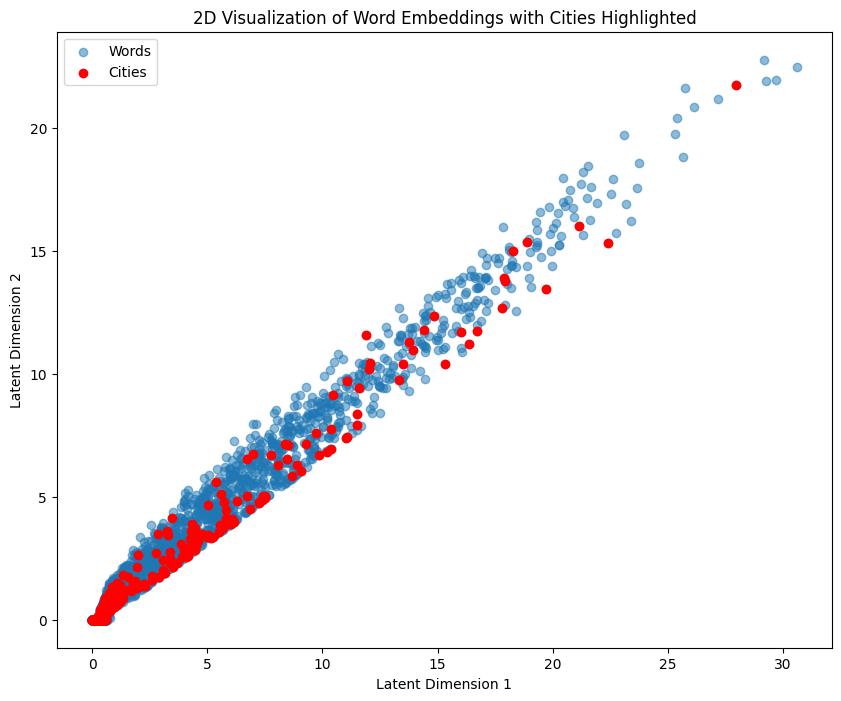

In [ ]:
import matplotlib.pyplot as plt

# Plot the 2D embeddings
plt.figure(figsize=(10, 8))
plt.scatter(encoded_df['dim1'], encoded_df['dim2'], alpha=0.5, label='Words')
plt.scatter(encoded_city_df['dim1'], encoded_city_df['dim2'], color='red', label='Cities')
plt.legend()
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('2D Visualization of Word Embeddings with Cities Highlighted')
plt.show()

**OLD AUTOENCODER**
- Forget this
- Doesn't matter

In [ ]:
# # Example word embeddings (num_words=1000, embedding_dim=300)
# num_words = 1000
# embedding_dim = 200
# word_embeddings = np.random.rand(num_words, embedding_dim)
# word_embeddings

In [ ]:
# # Input layer
# input_layer = Input(shape=(embedding_dim,))

# # Encoder layers
# encoded = Dense(128, activation='relu')(input_layer)
# encoded = Dense(64, activation='relu')(encoded)
# encoded = Dense(32, activation='relu')(encoded)

# # Bottleneck layer
# bottleneck = Dense(16, activation='relu')(encoded)

# # Decoder layers
# decoded = Dense(32, activation='relu')(bottleneck)
# decoded = Dense(64, activation='relu')(decoded)
# decoded = Dense(128, activation='relu')(decoded)
# output_layer = Dense(embedding_dim, activation='sigmoid')(decoded)

# # Define the autoencoder model
# autoencoder = Model(input_layer, output_layer)

# # Define the encoder model for dimensionality reduction
# encoder = Model(input_layer, bottleneck)

# # Compile the autoencoder
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
# # Train the autoencoder
# autoencoder.fit(mydf, mydf, epochs=50, batch_size=32, shuffle=True, validation_split=0.1)


In [ ]:
# # Use the encoder to transform word embeddings to the reduced dimension
# reduced_embeddings = encoder.predict(mydf)


# print("Reduced shape:", reduced_embeddings.shape)
# reduced_embeddings

**End of old autoencoder**
- yay
- we have new one

In [ ]:

# Convert the NumPy array to a pandas DataFrame
reduced_embeddings_df = pd.DataFrame(reduced_embeddings, index = words)
reduced_embeddings_df

NameError: name 'reduced_embeddings' is not defined

In [ ]:
import seaborn as sns

sns.scatterplot(x=reduced_embeddings_df[0], y=reduced_embeddings_df[1])

In [ ]:
mydf

In [ ]:
mydf_cleaned = reduced_embeddings_df[~(reduced_embeddings_df.index.astype(str).str.strip().str.match(r'^\d+$') | (reduced_embeddings_df.index.astype(str).str.strip().str.len() == 1))]

print(mydf_cleaned.shape)
mydf_cleaned

In [ ]:
cities = pd.read_csv("/content/drive/MyDrive/Research files/worldcities.csv")
cities_df = pd.DataFrame(cities)

# Convert the 'city' column to lowercase
cities_df['city'] = cities_df['city'].str.lower()

print(cities_df.shape)
print(cities_df.head(10))

In [ ]:
import random
from nltk.corpus import words
import nltk

nltk.download('words')

# Get the set of valid English words
valid_words = set(words.words())

print(len(valid_words))
random.sample(valid_words, 10)

In [ ]:
meaningful_filter = valid_words | set(cities_df['city'])

#number of nltk.words and cities which duplicates are removed, two of them union together

len(meaningful_filter)

In [ ]:
mydf_filtered = mydf_cleaned[mydf_cleaned.index.isin(meaningful_filter)]

mydf_filtered

In [ ]:
data = mydf_filtered

# Separate the words and embeddings
words = data.index.values
embeddings = data.iloc[:, 0:].values

words

In [ ]:
embeddings

In [ ]:
from scipy.spatial.distance import cosine

df = mydf_filtered

# Define cosine similarity function
def compute_cosine_similarity(vector1, vector2):
    return 1 - cosine(vector1, vector2)

# Select target word
target_word = "lithium"

# Compute similarities
target_vector = df[df.index == target_word].iloc[:, 0:].values.flatten()
similarities = []
for index, row in df.iterrows():
    word = index
    word_vector = row.iloc[0:].values
    similarity = compute_cosine_similarity(target_vector, word_vector)
    similarities.append((word, similarity))

# Convert to DataFrame for easier comparison
similarities_df = pd.DataFrame(similarities, columns=['city', 'similarity'])
print(similarities_df.head())

In [ ]:
similarities_df.sort_values('similarity', ascending=False)

In [ ]:
# Assuming cities is a pandas DataFrame
dictionary = cities_df[['city', 'lat', 'lng', 'country', 'admin_name']]

# Convert the 'city' column to lowercase
dictionary['city'] = dictionary['city'].str.lower()
dictionary.head(5)

In [ ]:
# Unzip the word_similarity_pairs to get a list of words and similarity scores
word_list = list(similarities_df['city'])
similarity_list = list(similarities_df['similarity'])

# Create a new dataframe from the word_similarity_pairs
sim_df = pd.DataFrame({
    'city': word_list,
    'similarity': similarity_list
})

# Filter the original dataframe to extract rows that match the words in word_list
filtered_df = dictionary[dictionary['city'].isin(word_list)]

# Merge the filtered dataframe with the similarity dataframe on the 'word' column
merged_df = pd.merge(filtered_df, sim_df, on='city', how='left')

merged_df

In [ ]:
# Assuming 'dictionary' and 'mydf3' are pandas DataFrames
common_words = pd.Series(list(set(dictionary['city']).intersection(set(similarities_df['city']))))

print(common_words.shape)
# There is a word called nan that got identified as not word, so it got filtered

In [ ]:
# Sort the merged dataframe based on the similarity column in descending order
sorted_df = merged_df.sort_values(by='similarity', ascending=False)

print(sorted_df)

In [ ]:
# pip install cartopy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [ ]:
data = sorted_df.head(10)
data.head(10)

In [ ]:
data = data.head(10)

latitudes = data['lat'].tolist()
longitudes = data['lng'].tolist()

print("First 10 Latitudes:", latitudes)
print("First 10 Longitudes:", longitudes)

In [ ]:
sim_values = data['similarity'].tolist()

# Normalize color values to range [0, 1]
norm = plt.Normalize(min(sim_values), max(sim_values))

print("First 5 sim_values:", sim_values)

In [ ]:
# Create a matplotlib figure and axis with Cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot latitude and longitude data with colors
scatter = ax.scatter(longitudes, latitudes, c=sim_values, cmap='viridis', norm=norm, s=100, marker='o', alpha=0.8)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Color Bar Label')

# Customize the plot (add title, grid, etc.)
ax.set_title('Latitude and Longitude Plot')
ax.gridlines(draw_labels=True)  # Add gridlines with labels
ax.coastlines()  # Add coastlines

# Show the plot
plt.show()